## Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks##


### Contribution
1. set constraints on Convolutional GANs to make it stable.
2. use trained discriminator for image classification tasks
3. visualize the filters of GANs and show how different fliters have learnt to draw specific objects

### Model Architecture
- General Idea: `DCGAN ≈ CNN + GAN`
- Change `G` and `D` in original GAN to **two CNN** with some procedures, taking advantages of the *features extraction* learning ability of CNN.
   - Use `batch normalization` in generator and discriminator, except applied in the output layer of G and the input layer of D for avoiding sample oscillation and model instability.
   - Replace any <u>pooling layers</u> with strided convolutions(discriminator) and fractional-strided convolutions(generator)
     - `Stride`: the number of pixels shift over the input matrix.
     - allow network to learn its own spatial downsampling.
   - Remove `FC hidden layers` for deeper architecture
      - for discriminator, the last convLayer is flattened and fed to a single <u>sigmoid</u> output.
   - Use `ReLU` in **generator** for all *input* and *hidden layers*, for *output* layer use `Tanh`.
   - Use `LeakyReLU` in discriminator for all layers.

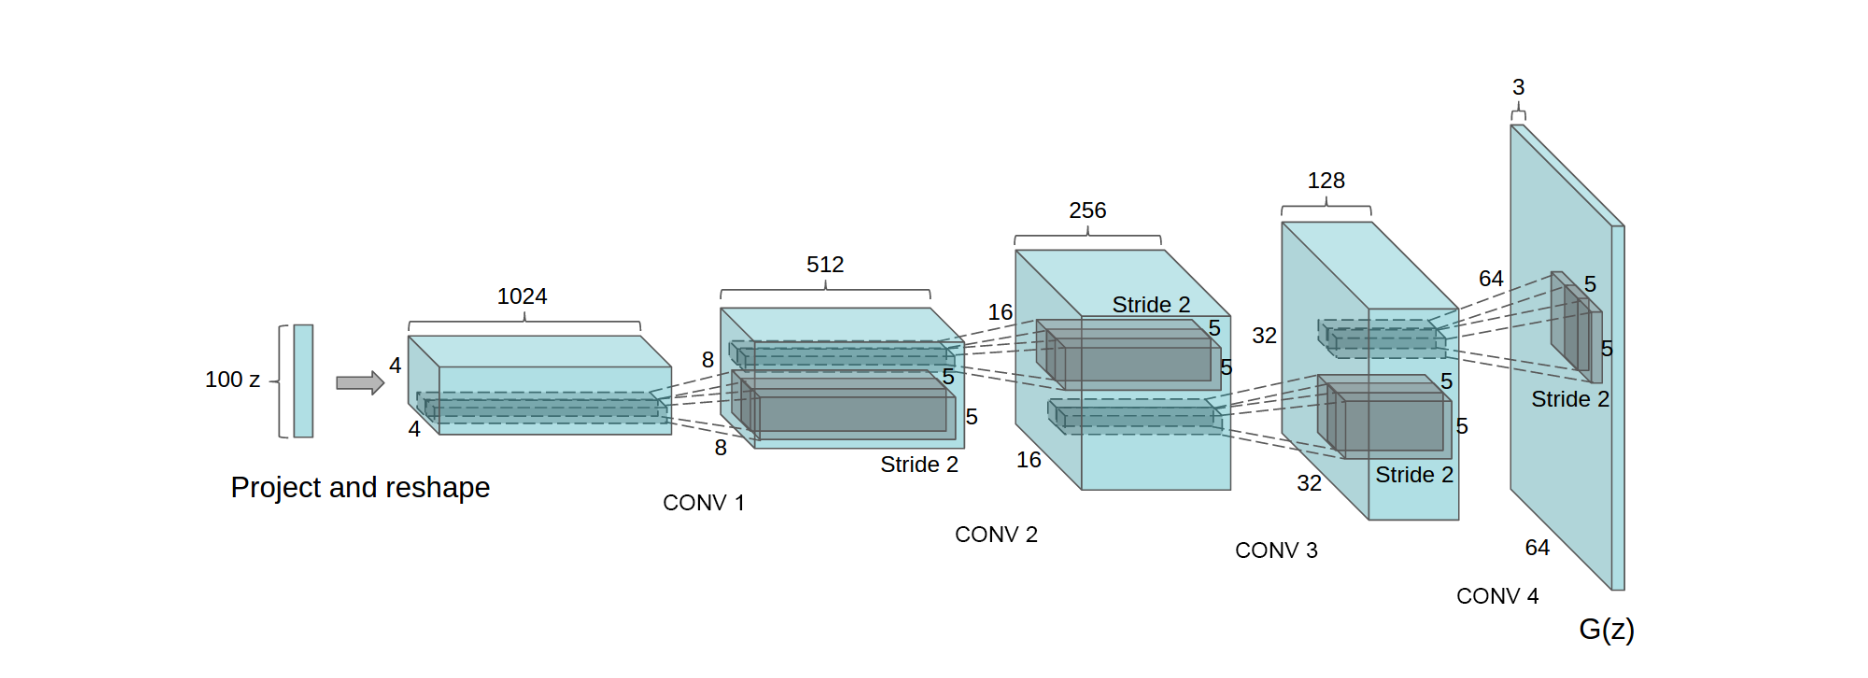

### Training Procedure
- No pre-processing applied,tahn sets image scale into [-1, 1].
- use three datasets
- trained with mini-batch SGD with size of 128
- Weight intialization: $W~Normal(μ=0,σ=0.02)$
- LeakyReLU: the slope of leak=0.2
- Hyperparameter Tuning: use Adam
- learning rate= 0.0002
- To accelerate training use momentum动量, set $β_1=0.5$ to stablize training.

### CNN
#### Application
- image recognition, image classification, object recognition, face recognition
- input image as RGB or grayscale 3-dimensional array
- Structure: take image classification as example
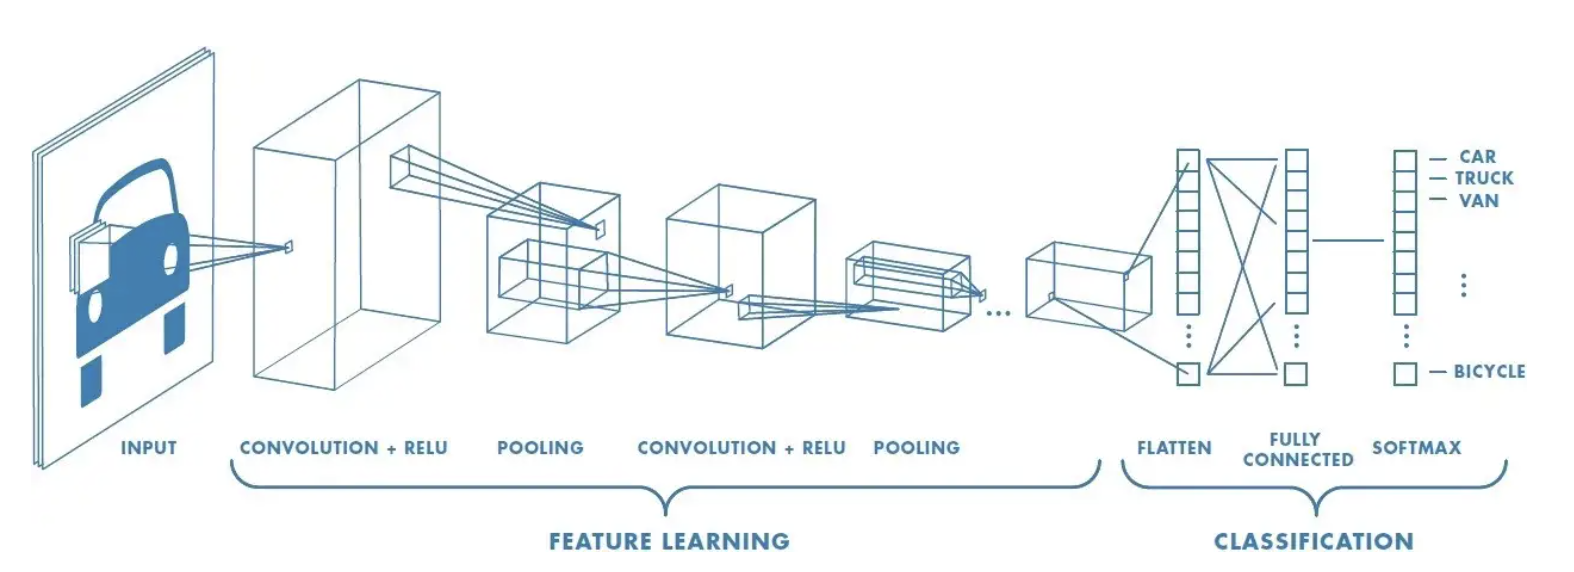

#### Concepts
1. **Convolution layer**: extract features, takes *image matrix* and *filter matrix* as input, get `feature map` as output.
   - filters effects: perform operations such as edge detection, blur, or sharpen.
   - Types of filter: Identity, Edge Detection, Sharpen, Box blur, Gaussian blur.
2. **ReLU**: non-linear operation
   - function: $f(x)=max(0,x)$
3. **Pooling layer**: reduce dimensionality size.
   - reduce # of parameters to learn and computation performed in the network but keep the important information
   - it focus on summarize features generated by convolution layer
   - Types:
     - Max Pooling
     - Average Pooling
     - Global Pooling
  - Called `spatial pooling`, `subsampling`, `downsampling`
4. **Fully Connected Layer(FC)**
   - the neuron applies a linear transformation with activation function($f$) to the input vector($x$) throught the weight matrix($W$)
   - every input influences every output, operates on a flattened input where each input is connected to all neurals.
5. **Padding**: use it when filter cannot fit the input image well
   - pad the pic with 0s--`zero padding`
   - drop the part of image where filter does not fit--`valid padding`


### References
- Convolutional Neural Networks cheatsheet.http://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
- Understanding of Convolutional Neural Network(CNN)--Deep Learning.http://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148
- DCGAN to generate face images.https://keras.io/examples/generative/dcgan_overriding_train_step/
- 20.2.Deep Convolutional Generative Adverisarial Networks.https://d2l.ai/chapter_generative-adversial-networks/dcgan.html


## Coding Project: Establish a DCGAN for Image Generation

#### Initialization

In [1]:
import os
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
#define the size of image input
H=64
W=64
C=3

In [3]:
#weight intialization
w_init=tf.keras.initializers.RandomNormal(mean=0, stddev=0.02)

#### Dataset Import

In [ ]:
def load_image(image_path):
  img=tf.io.read_file()
  img=tf.io.decode_png(img)
  img=tf.image.resize_with_crop_or_pad(img, H, W)
  img=tf.cast(img,tf.float32)
  img=(img-)